In [97]:
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [141]:
dfs_event_rate = []
dfs_process_time = []
dfs_drop_total_events = []

for folder in glob.glob("*/"):
    fs = glob.glob(f"{folder}/*.csv")
    folder = folder.replace("dt-vol-", "").replace("/", "")
    for f in fs:
        print(f)
        df = pd.read_csv(f)

        if "currDropTotalEvents" in f:
            df.columns = ["time", "current-drop"]
            title = "current-drop-total-events"
            # add a column of folder
                # remove "dt-vol" in folder name
            df["folder"] = folder
            dfs_drop_total_events.append(df)

        elif "Process Time" in f:
            df.columns = ["time", "process-time"]
            # the entry is like "1.22 ms", and remove the "ms" and convert to float
            df["process-time"] = df["process-time"].str.replace("ms", "").astype(float)
            title = "process-time"
            df["folder"] = folder
            dfs_process_time.append(df)

        elif "evRate" in f:
            df.columns = ["time", "event-rate"]
            title = "event-rate"
            df["folder"] = folder
            dfs_event_rate.append(df)

dfs_event_rate = pd.concat(dfs_event_rate)
dfs_process_time = pd.concat(dfs_process_time)
dfs_drop_total_events = pd.concat(dfs_drop_total_events)

display(dfs_event_rate)
display(dfs_process_time)
display(dfs_drop_total_events)



dt-vol-1g-1node/evRate-data-2024-06-12 13_43_35.csv
dt-vol-1g-1node/ERSAP Process Time-data-2024-06-12 13_42_06.csv
dt-vol-1g-1node/currDropTotalEvents-data-2024-06-12 13_43_17.csv
dt-vol-3g-1node/currDropTotalEvents-data-2024-06-12 15_17_34.csv
dt-vol-3g-1node/ERSAP Process Time-data-2024-06-12 15_17_25.csv
dt-vol-3g-1node/evRate-data-2024-06-12 15_17_43.csv
dt-vol-2g-1node/currDropTotalEvents-data-2024-06-12 14_35_49.csv
dt-vol-2g-1node/ERSAP Process Time-data-2024-06-12 14_35_35.csv
dt-vol-2g-1node/evRate-data-2024-06-12 14_36_00.csv


,time,event-rate,folder
0,2024-06-11 16:02:30,4310,1g-1node
1,2024-06-11 16:02:45,4296,1g-1node
2,2024-06-11 16:03:00,4295,1g-1node
3,2024-06-11 16:03:15,4302,1g-1node
4,2024-06-11 16:03:30,4301,1g-1node
...,...,...,...
39,2024-06-11 17:02:15,8598,2g-1node
40,2024-06-11 17:02:30,8615,2g-1node
41,2024-06-11 17:02:45,8605,2g-1node
42,2024-06-11 17:03:00,8610,2g-1node


,time,process-time,folder
0,2024-06-11 16:02:30,2.00,1g-1node
1,2024-06-11 16:02:45,1.84,1g-1node
2,2024-06-11 16:03:00,1.57,1g-1node
3,2024-06-11 16:03:15,1.82,1g-1node
4,2024-06-11 16:03:30,1.55,1g-1node
...,...,...,...
39,2024-06-11 17:02:15,1.47,2g-1node
40,2024-06-11 17:02:30,1.45,2g-1node
41,2024-06-11 17:02:45,1.51,2g-1node
42,2024-06-11 17:03:00,1.50,2g-1node


,time,current-drop,folder
0,2024-06-11 16:02:30,0.422,1g-1node
1,2024-06-11 16:02:45,0.444,1g-1node
2,2024-06-11 16:03:00,0.511,1g-1node
3,2024-06-11 16:03:15,0.400,1g-1node
4,2024-06-11 16:03:30,0.378,1g-1node
...,...,...,...
39,2024-06-11 17:02:15,0.489,2g-1node
40,2024-06-11 17:02:30,0.644,2g-1node
41,2024-06-11 17:02:45,0.511,2g-1node
42,2024-06-11 17:03:00,0.556,2g-1node


,event-rate
folder,
1g-1node,4300.166667
2g-1node,8609.159091
3g-1node,12912.744186


,event-rate
folder,
1g-1node,4.292148
2g-1node,8.776139
3g-1node,13.427217


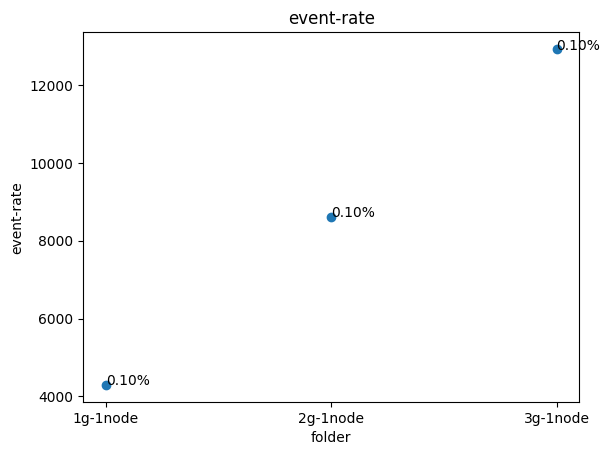

,process-time
folder,
1g-1node,1.820417
2g-1node,1.481364
3g-1node,1.240465


,process-time
folder,
1g-1node,0.202648
2g-1node,0.155557
3g-1node,0.095368


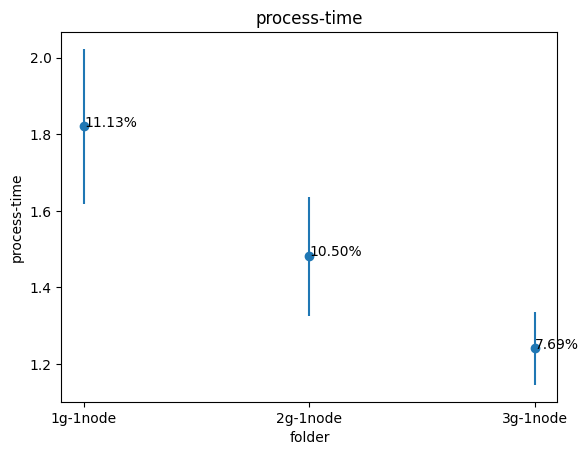

,current-drop
folder,
1g-1node,0.295681
2g-1node,0.483909
3g-1node,0.788535


,current-drop
folder,
1g-1node,0.098162
2g-1node,0.095955
3g-1node,0.114740


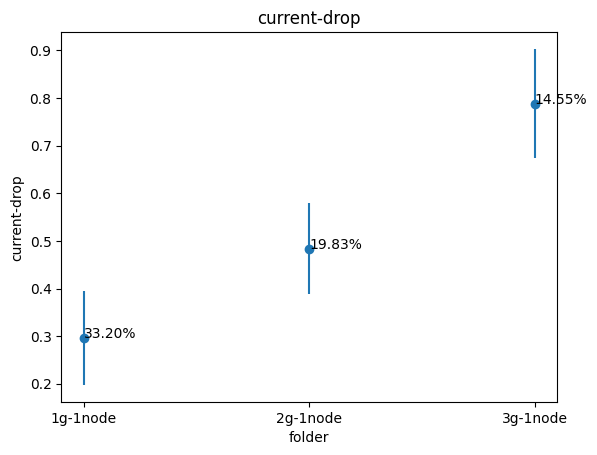

In [142]:
for df in [dfs_event_rate, dfs_process_time, dfs_drop_total_events]:
    # get the mean and std of each folder
    df_mean = df.groupby("folder").mean()
    df_std = df.groupby("folder").std()

    display(df_mean)
    display(df_std)

    # plot mean and std of each folder in the same plot. The dot is the mean, and the error bar is the std centered at the mean
    plt.errorbar(df_mean.index, df_mean[df.columns[1]], yerr=df_std[df.columns[1]], fmt='o')
    # annotate the percentage of the std
    for i, txt in enumerate(df_std[df.columns[1]]):
        plt.annotate(f"{txt/df_mean[df.columns[1]].iloc[i]:.2%}", (df_mean.index[i], df_mean[df.columns[1]].iloc[i]))
    plt.xlabel("folder")
    plt.ylabel(df.columns[1])
    plt.title(df.columns[1])
    plt.show()

# # get mean and std of event rate based on folder
# dfs_event_rate_mean = dfs_event_rate.groupby("folder").mean()
# dfs_event_rate_std = dfs_event_rate.groupby("folder").std()

# display(dfs_event_rate_mean)
# display(dfs_event_rate_std)

# # plot mean and std of each folder in the same plot. The dot is the mean, and the error bar is the std centered at the mean
# plt.errorbar(dfs_event_rate_mean.index, dfs_event_rate_mean["event-rate"], yerr=dfs_event_rate_std["event-rate"], fmt='o')
# plt.xlabel("folder")
# plt.ylabel("event-rate")
# plt.title("event-rate")
# plt.show()
